In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
import cv2 as cv
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
PATH = 'D:/Workshop/PhD/Data/ViaLactea/PPMAP_Results/'
IMG_PATH = 'D:/Workshop/PhD/Data/ViaLactea/Temperature Analysis/All Tiles at 14K/'

In [3]:
bins = np.logspace(np.log10(1e20),
                   np.log10(2e23), 
                   100)
bins

array([1.00000000e+20, 1.07980103e+20, 1.16597026e+20, 1.25901589e+20,
       1.35948666e+20, 1.46797509e+20, 1.58512102e+20, 1.71161531e+20,
       1.84820397e+20, 1.99569255e+20, 2.15495087e+20, 2.32691817e+20,
       2.51260863e+20, 2.71311739e+20, 2.92962695e+20, 3.16341420e+20,
       3.41585791e+20, 3.68844689e+20, 3.98278875e+20, 4.30061940e+20,
       4.64381325e+20, 5.01439433e+20, 5.41454816e+20, 5.84663468e+20,
       6.31320215e+20, 6.81700219e+20, 7.36100598e+20, 7.94842184e+20,
       8.58271409e+20, 9.26762351e+20, 1.00071894e+21, 1.08057734e+21,
       1.16680853e+21, 1.25992105e+21, 1.36046405e+21, 1.46903048e+21,
       1.58626062e+21, 1.71284586e+21, 1.84953272e+21, 1.99712733e+21,
       2.15650015e+21, 2.32859109e+21, 2.51441505e+21, 2.71506796e+21,
       2.93173318e+21, 3.16568851e+21, 3.41831371e+21, 3.69109867e+21,
       3.98565214e+21, 4.30371129e+21, 4.64715188e+21, 5.01799939e+21,
       5.41844090e+21, 5.85083807e+21, 6.31774097e+21, 6.82190321e+21,
      

100%|████████████████████████████████████████████████████████████████████████████████| 84/84 [1:04:20<00:00, 45.96s/it]


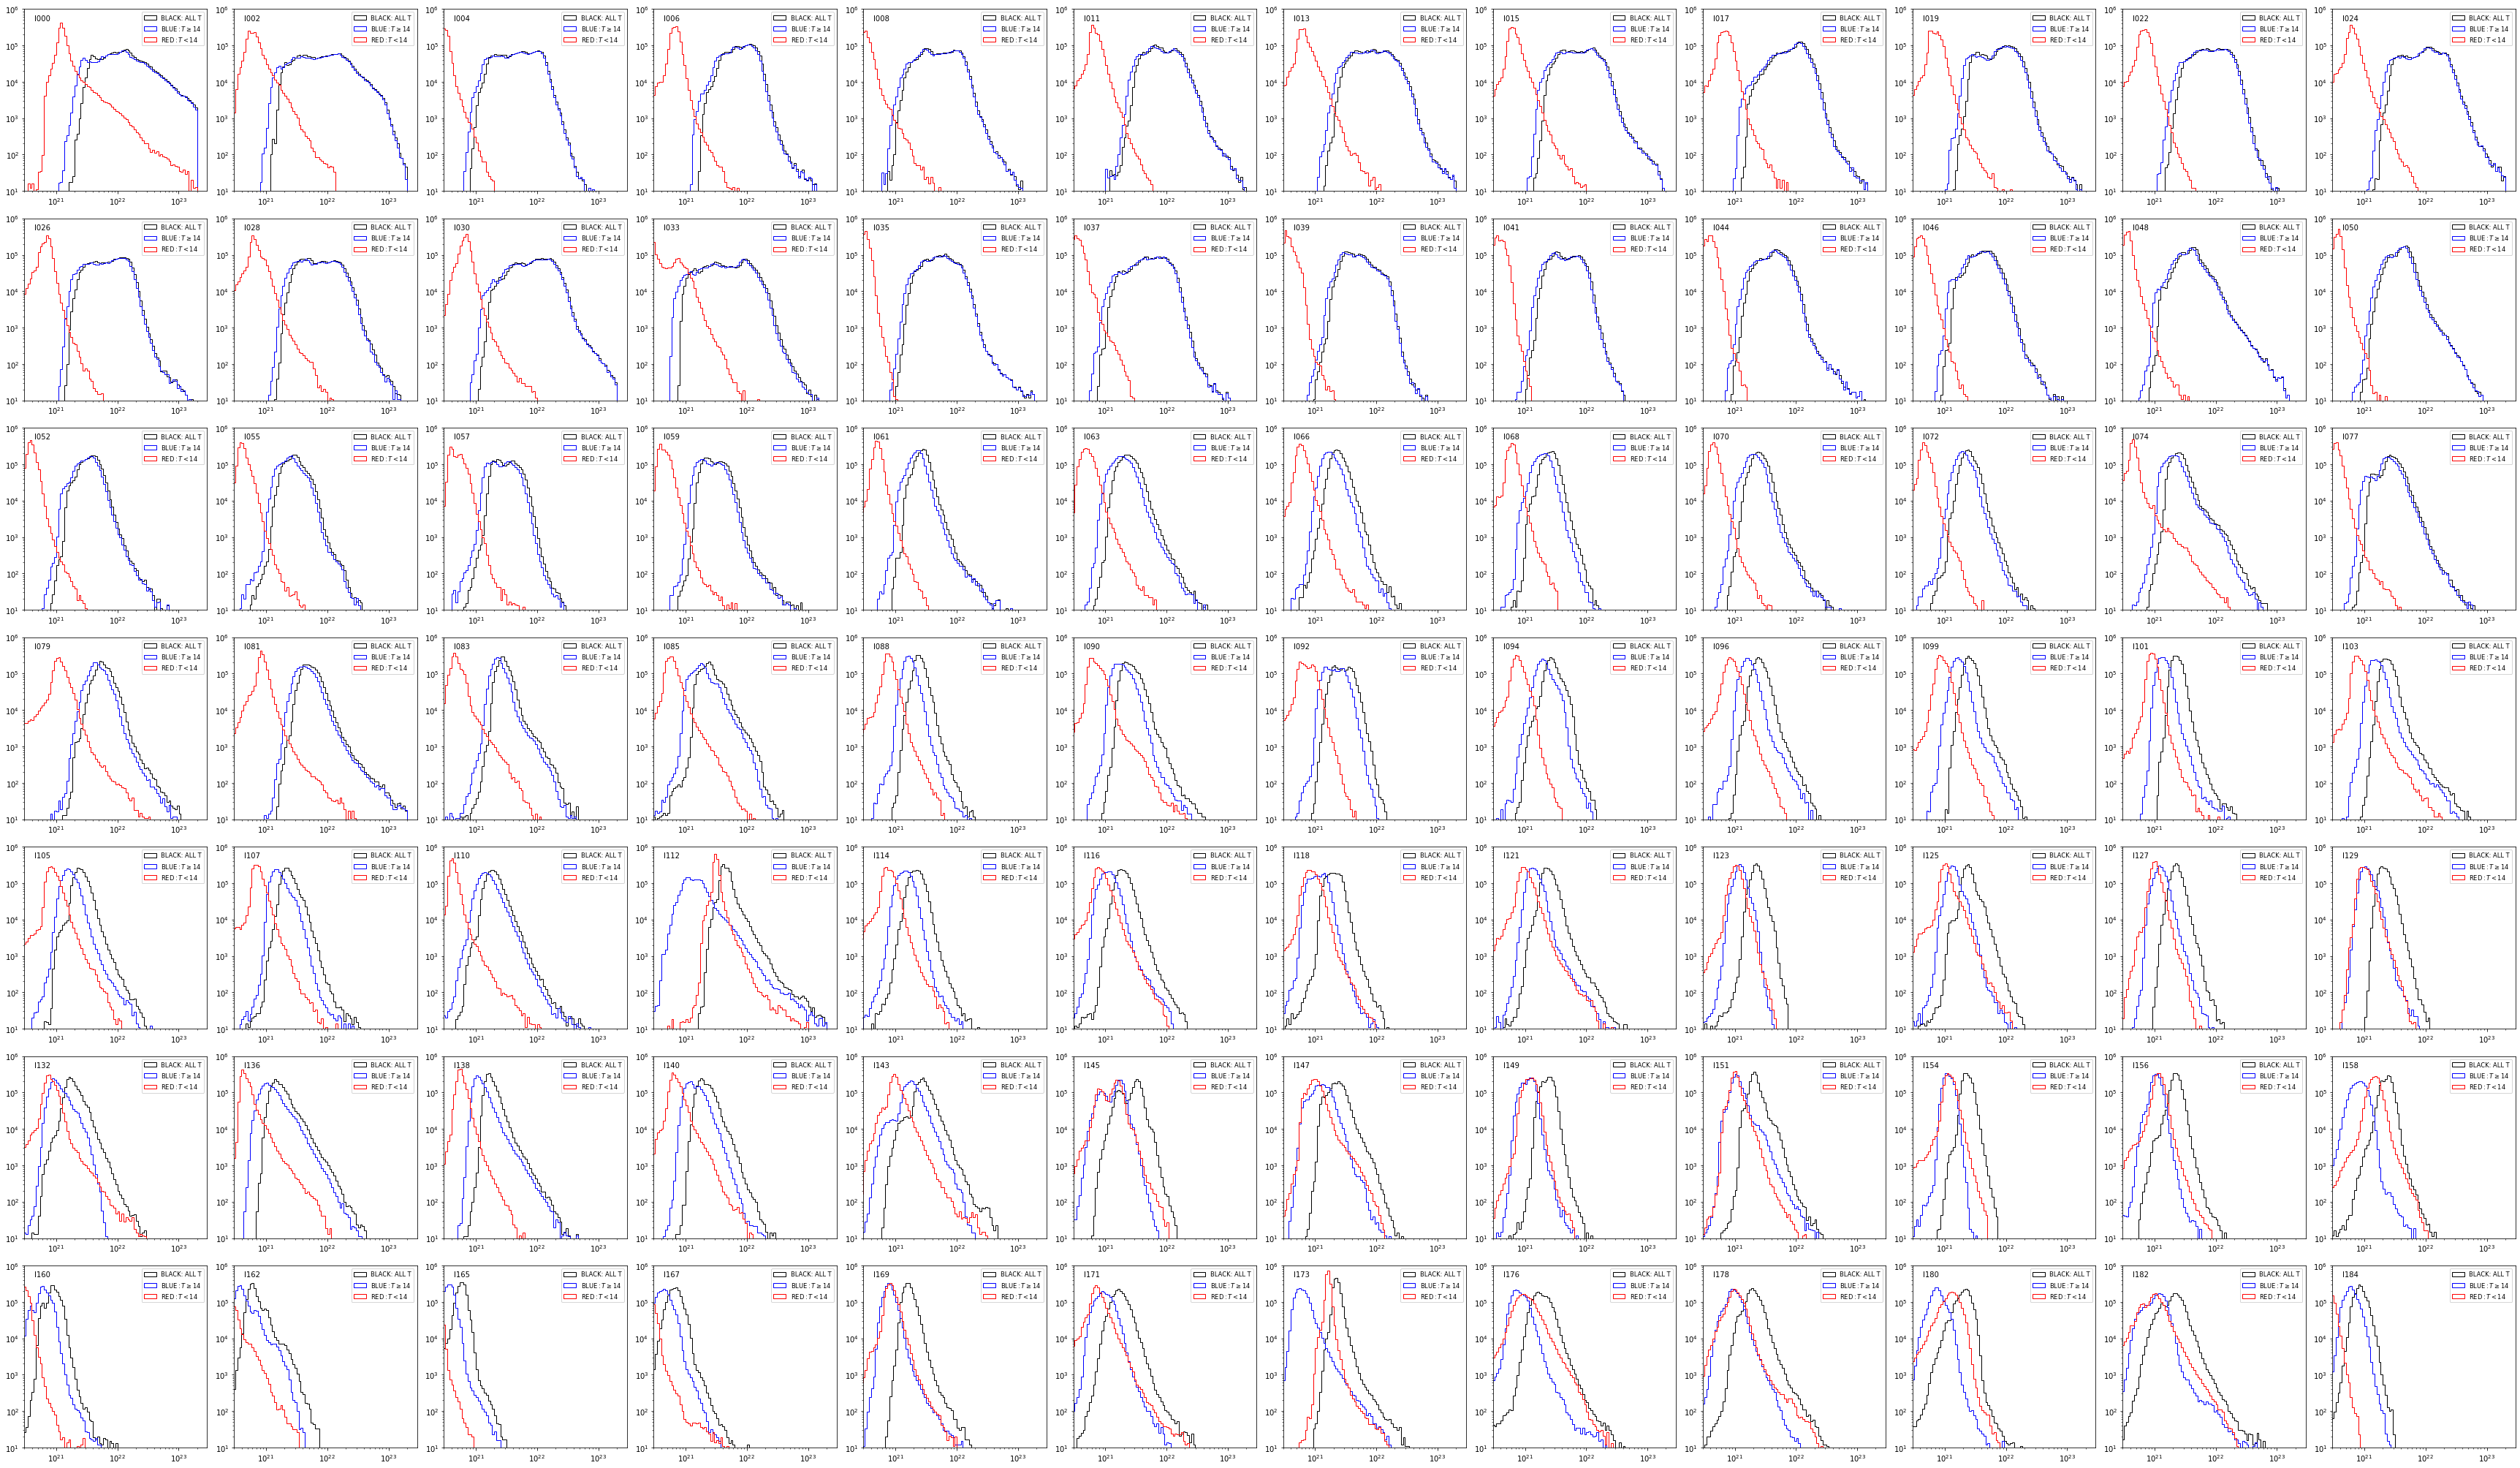

In [25]:
f, ax = plt.subplots(7,12,figsize = (48,28))#, sharex=True, sharey=True)
ax = ax.flatten()
for c,folder in enumerate(tqdm(os.listdir(PATH)[:7*12])):
    folder_path = os.path.join(PATH,folder)
    tile_name = folder[:4]
    filename = os.listdir(folder_path)[1]
    hdu = fits.open(os.path.join(folder_path,filename))
    df = pd.DataFrame()
    for i,image in enumerate(hdu[0].data):
        temp = hdu[0].header[f'TEMP{i+1:02}']
        temp_df = pd.DataFrame(image*10**20).unstack().reset_index()
        temp_df.columns = ['x','y','N']
        temp_df['T'] = [temp]*len(temp_df)
        df = df.append(temp_df)
    ax[c].hist(df[['x','y','N']].groupby(['x','y']).sum()['N'], 
             log=True, 
             bins = bins,aaaaa
             histtype = u'step',
             color='k',
             label= 'BLACK: ALL T')
    ax[c].hist(df[df['T']>=14][['x','y','N']].groupby(['x','y']).sum()['N'], 
             log=True, 
             bins = bins,
             histtype = u'step',
             color='b',
             label= r'$\mathrm{BLUE:} T \geq 14$')
    ax[c].hist(df[df['T']<14][['x','y','N']].groupby(['x','y']).sum()['N'], 
             log=True, 
             bins = bins,
             histtype = u'step',
             color='r',
             label= r'$\mathrm{RED:} T < 14$')
    ax[c].set_xscale('log')
    ax[c].set_ylim(1e1,1e6)
    ax[c].set_xlim(3e20)
    ax[c].legend(fontsize = 'small')
    ax[c].text(0.1,0.95, f'{tile_name}', horizontalalignment='center',
               verticalalignment='center', transform=ax[c].transAxes)
plt.tight_layout()
plt.savefig(f'{IMG_PATH}Montage1.png')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 84/84 [1:06:11<00:00, 47.28s/it]


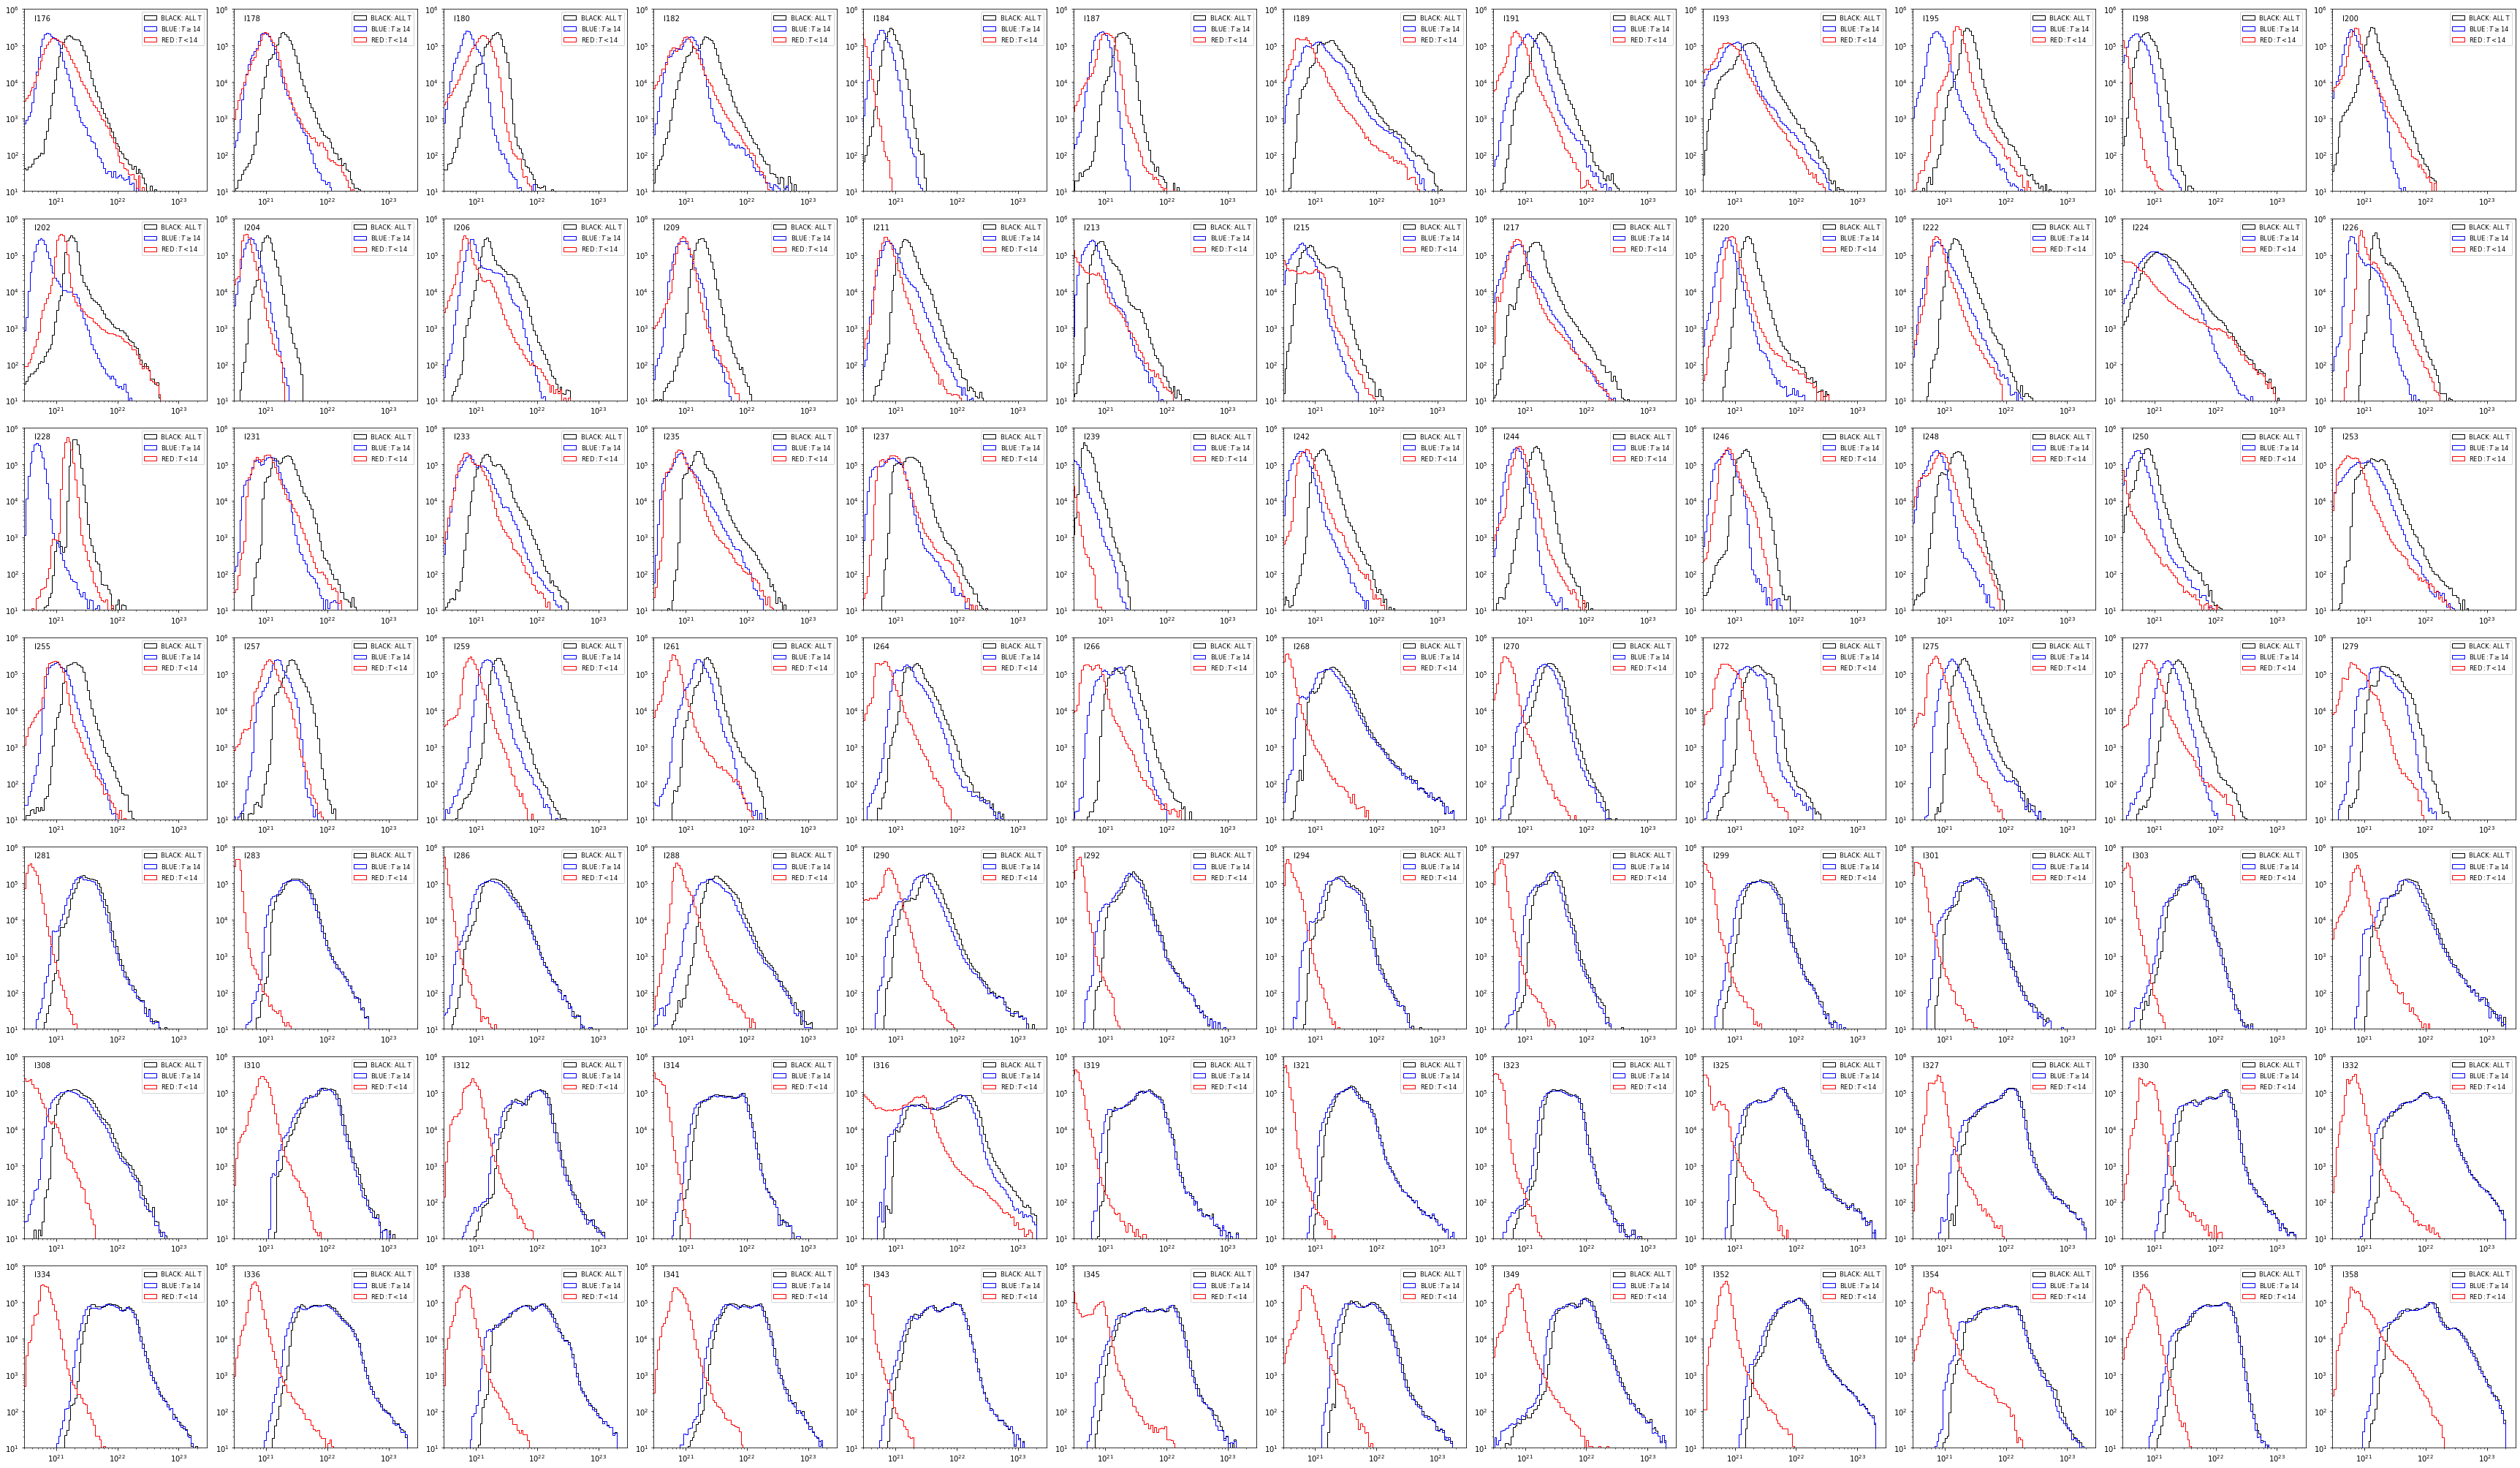

In [26]:
f, ax = plt.subplots(7,12,figsize = (48,28))#, sharex=True, sharey=True)
ax = ax.flatten()
for c,folder in enumerate(tqdm(os.listdir(PATH)[79:])):
    folder_path = os.path.join(PATH,folder)
    tile_name = folder[:4]
    filename = os.listdir(folder_path)[1]
    hdu = fits.open(os.path.join(folder_path,filename))
    df = pd.DataFrame()
    for i,image in enumerate(hdu[0].data):
        temp = hdu[0].header[f'TEMP{i+1:02}']
        temp_df = pd.DataFrame(image*10**20).unstack().reset_index()
        temp_df.columns = ['x','y','N']
        temp_df['T'] = [temp]*len(temp_df)
        df = df.append(temp_df)
    ax[c].hist(df[['x','y','N']].groupby(['x','y']).sum()['N'], 
             log=True, 
             bins = bins,
             histtype = u'step',
             color='k',
             label= 'BLACK: ALL T')
    ax[c].hist(df[df['T']>=14][['x','y','N']].groupby(['x','y']).sum()['N'], 
             log=True, 
             bins = bins,
             histtype = u'step',
             color='b',
             label= r'$\mathrm{BLUE:} T \geq 14$')
    ax[c].hist(df[df['T']<14][['x','y','N']].groupby(['x','y']).sum()['N'], 
             log=True, 
             bins = bins,
             histtype = u'step',
             color='r',
             label= r'$\mathrm{RED:} T < 14$')
    ax[c].set_xscale('log')
    ax[c].set_ylim(1e1,1e6)
    ax[c].set_xlim(3e20)
    ax[c].legend(fontsize = 'small')
    ax[c].text(0.1,0.95, f'{tile_name}', horizontalalignment='center',
               verticalalignment='center', transform=ax[c].transAxes)
plt.tight_layout()
plt.savefig(f'{IMG_PATH}Montage2.png')
plt.show()

  0%|                                                                                          | 0/163 [00:00<?, ?it/s]

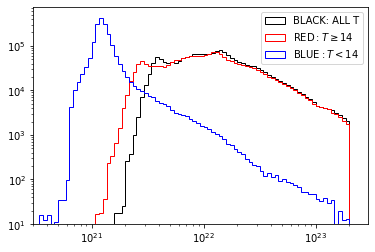

  0%|                                                                                          | 0/163 [00:46<?, ?it/s]


In [11]:
for folder in tqdm(os.listdir(PATH)):
    folder_path = os.path.join(PATH,folder)
    tile_name = folder[:4]
    filename = os.listdir(folder_path)[1]
    hdu = fits.open(os.path.join(folder_path,filename))
    df = pd.DataFrame()
    for i,image in enumerate(hdu[0].data):
        temp = hdu[0].header[f'TEMP{i+1:02}']
        temp_df = pd.DataFrame(image*10**20).unstack().reset_index()
        temp_df.columns = ['x','y','N']
        temp_df['T'] = [temp]*len(temp_df)
        df = df.append(temp_df)
    plt.figure()
    plt.hist(df[['x','y','N']].groupby(['x','y']).sum()['N'], 
             log=True, 
             bins = bins,
             histtype = u'step',
             color='k',
             label= 'BLACK: ALL T')
    plt.hist(df[df['T']>=14][['x','y','N']].groupby(['x','y']).sum()['N'], 
             log=True, 
             bins = bins,
             histtype = u'step',
             color='r',
             label= r'$\mathrm{RED:} T \geq 14$')
    plt.hist(df[df['T']<14][['x','y','N']].groupby(['x','y']).sum()['N'], 
             log=True, 
             bins = bins,
             histtype = u'step',
             color='b',
             label= r'$\mathrm{BLUE:} T < 14$')
    plt.xscale('log')
    plt.legend()
    plt.ylim(1e1)
    plt.xlim(3e20)
    plt.savefig(f'{IMG_PATH}{tile_name}.png')
    plt.show()
    break

In [49]:
df = pd.DataFrame({'column_density':[],
                   'temp':[]})
for i,image in enumerate(hdu[0].data):
    df = df.append({'column_density':image.flatten()*(10**20),
               'temp':hdu[0].header[f'TEMP{i+1:02}']}, ignore_index=True)
df = df.explode('column_density').dropna()
df

,column_density,temp
0,4000146314501762560.0,8.0
0,3843246772885322752.0,8.0
0,3767121583223343104.0,8.0
0,3779090195894241280.0,8.0
0,3851678967475891200.0,8.0
...,...,...
11,0.0,50.0
11,0.0,50.0
11,0.0,50.0
11,0.0,50.0


In [52]:
df = df[df['column_density']>0]
df

,column_density,temp
0,4000146314501762560.0,8.0
0,3843246772885322752.0,8.0
0,3767121583223343104.0,8.0
0,3779090195894241280.0,8.0
0,3851678967475891200.0,8.0
...,...,...
11,873851682990789376.0,50.0
11,665203761309385344.0,50.0
11,197289418429136288.0,50.0
11,20432661403901876.0,50.0


In [64]:
df['column_density_log'] = np.log(df['column_density'].values.astype(float))
df

C:\Users\Matt\.conda\envs\astronomy\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,column_density,temp,column_density_log
0,4000146314501762560.0,8.0,42.832863
0,3843246772885322752.0,8.0,42.792849
0,3767121583223343104.0,8.0,42.772843
0,3779090195894241280.0,8.0,42.776015
0,3851678967475891200.0,8.0,42.795041
...,...,...,...
11,873851682990789376.0,50.0,41.311687
11,665203761309385344.0,50.0,41.038870
11,197289418429136288.0,50.0,39.823448
11,20432661403901876.0,50.0,37.555911


In [71]:
bins = np.logspace(np.log10(min(df['column_density'])),
                   np.log10(max(df['column_density'])), 
                   100)

bins

array([3.69824273e-18, 9.56574713e-18, 2.47424317e-17, 6.39979209e-17,
       1.65534816e-16, 4.28166647e-16, 1.10748109e-15, 2.86457240e-15,
       7.40940420e-15, 1.91649094e-14, 4.95712940e-14, 1.28219400e-13,
       3.31647879e-13, 8.57828971e-13, 2.21883084e-12, 5.73915135e-12,
       1.48446910e-11, 3.83967660e-11, 9.93157510e-11, 2.56886698e-10,
       6.64454275e-10, 1.71865452e-09, 4.44541252e-09, 1.14983508e-08,
       2.97412377e-08, 7.69276600e-08, 1.98978433e-07, 5.14670755e-07,
       1.33122963e-06, 3.44331266e-06, 8.90635382e-06, 2.30368677e-05,
       5.95863678e-05, 1.54124045e-04, 3.98651940e-04, 1.03113936e-03,
       2.66710953e-03, 6.89865354e-03, 1.78438194e-02, 4.61542081e-02,
       1.19380883e-01, 3.08786477e-01, 7.98696455e-01, 2.06588071e+00,
       5.34353583e+00, 1.38214055e+01, 3.57499711e+01, 9.24696426e+01,
       2.39178789e+02, 6.18651610e+02, 1.60018293e+03, 4.13897799e+03,
       1.07057378e+04, 2.76910922e+04, 7.16248243e+04, 1.85262301e+05,
      

In [108]:
plt.figure()
plt.hist(df['column_density'], log=True, bins = bins)
plt.xscale('log')
plt.show()

array([1.00000000e+20, 1.07980103e+20, 1.16597026e+20, 1.25901589e+20,
       1.35948666e+20, 1.46797509e+20, 1.58512102e+20, 1.71161531e+20,
       1.84820397e+20, 1.99569255e+20, 2.15495087e+20, 2.32691817e+20,
       2.51260863e+20, 2.71311739e+20, 2.92962695e+20, 3.16341420e+20,
       3.41585791e+20, 3.68844689e+20, 3.98278875e+20, 4.30061940e+20,
       4.64381325e+20, 5.01439433e+20, 5.41454816e+20, 5.84663468e+20,
       6.31320215e+20, 6.81700219e+20, 7.36100598e+20, 7.94842184e+20,
       8.58271409e+20, 9.26762351e+20, 1.00071894e+21, 1.08057734e+21,
       1.16680853e+21, 1.25992105e+21, 1.36046405e+21, 1.46903048e+21,
       1.58626062e+21, 1.71284586e+21, 1.84953272e+21, 1.99712733e+21,
       2.15650015e+21, 2.32859109e+21, 2.51441505e+21, 2.71506796e+21,
       2.93173318e+21, 3.16568851e+21, 3.41831371e+21, 3.69109867e+21,
       3.98565214e+21, 4.30371129e+21, 4.64715188e+21, 5.01799939e+21,
       5.41844090e+21, 5.85083807e+21, 6.31774097e+21, 6.82190321e+21,
      

In [77]:
bins = np.logspace(np.log10(3e20),
                   np.log10(2e23), 
                   100)
bins

array([1.00000000e+19, 1.10520985e+19, 1.22148882e+19, 1.35000147e+19,
       1.49203493e+19, 1.64901170e+19, 1.82250398e+19, 2.01424935e+19,
       2.22616822e+19, 2.46038305e+19, 2.71923959e+19, 3.00533038e+19,
       3.32152074e+19, 3.67097745e+19, 4.05720044e+19, 4.48405790e+19,
       4.95582496e+19, 5.47722657e+19, 6.05348477e+19, 6.69037100e+19,
       7.39426394e+19, 8.17221335e+19, 9.03201070e+19, 9.98226721e+19,
       1.10325001e+20, 1.21932277e+20, 1.34760754e+20, 1.48938913e+20,
       1.64608754e+20, 1.81927217e+20, 2.01067752e+20, 2.22222061e+20,
       2.45602011e+20, 2.71441762e+20, 3.00000109e+20, 3.31563076e+20,
       3.66446778e+20, 4.05000589e+20, 4.47610641e+20, 4.94703690e+20,
       5.46751392e+20, 6.04275025e+20, 6.67850710e+20, 7.38115184e+20,
       8.15772173e+20, 9.01599442e+20, 9.96456586e+20, 1.10129364e+21,
       1.21716057e+21, 1.34521786e+21, 1.48674803e+21, 1.64316857e+21,
       1.81604609e+21, 2.00711203e+21, 2.21827999e+21, 2.45166490e+21,
      

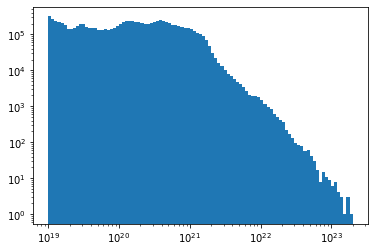

In [78]:
plt.figure()
plt.hist(df['column_density'], log=True, bins = bins)
plt.xscale('log')
plt.show()

# Sum of pixels

In [111]:
df = pd.DataFrame()
for i,image in enumerate(hdu[0].data):
    temp = hdu[0].header[f'TEMP{i+1:02}']
    temp_df = pd.DataFrame(image*10**20).unstack().reset_index()
    temp_df.columns = ['x','y','N']
    temp_df['T'] = [temp]*len(temp_df)
    df = df.append(temp_df)
df

            x     y    N     T
0           0     0  NaN   8.0
1           0     1  NaN   8.0
2           0     2  NaN   8.0
3           0     3  NaN   8.0
4           0     4  NaN   8.0
...       ...   ...  ...   ...
2073595  1439  1435  NaN  50.0
2073596  1439  1436  NaN  50.0
2073597  1439  1437  NaN  50.0
2073598  1439  1438  NaN  50.0
2073599  1439  1439  NaN  50.0

[24883200 rows x 4 columns]


In [120]:
df[['x','y','N']].groupby(['x','y']).sum()['N']

x     y   
0     0       0.0
      1       0.0
      2       0.0
      3       0.0
      4       0.0
             ... 
1439  1435    0.0
      1436    0.0
      1437    0.0
      1438    0.0
      1439    0.0
Name: N, Length: 2073600, dtype: float64

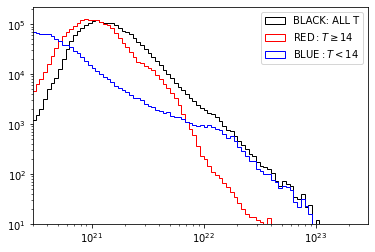

In [132]:
plt.figure()
plt.hist(df[['x','y','N']].groupby(['x','y']).sum()['N'], 
         log=True, 
         bins = bins,
         histtype = u'step',
         color='k',
         label= 'BLACK: ALL T')
plt.hist(df[df['T']>=14][['x','y','N']].groupby(['x','y']).sum()['N'], 
         log=True, 
         bins = bins,
         histtype = u'step',
         color='r',
         label= r'$\mathrm{RED:} T \geq 14$')
plt.hist(df[df['T']<14][['x','y','N']].groupby(['x','y']).sum()['N'], 
         log=True, 
         bins = bins,
         histtype = u'step',
         color='b',
         label= r'$\mathrm{BLUE:} T < 14$')
plt.xscale('log')
plt.legend()
plt.ylim(1e1)
plt.xlim(3e20)
plt.show()

In [129]:
pd.unique(df['T'])

array([ 8.     ,  9.45024, 11.1634 , 13.1871 , 15.5776 , 18.4015 ,
       21.7373 , 25.6779 , 30.3328 , 35.8315 , 42.327  , 50.     ])

In [136]:
df[df['T']<8][['x','y','N']].groupby(['x','y']).sum()

,
x,y


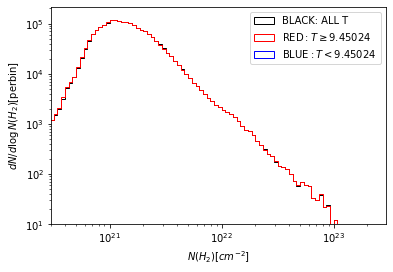

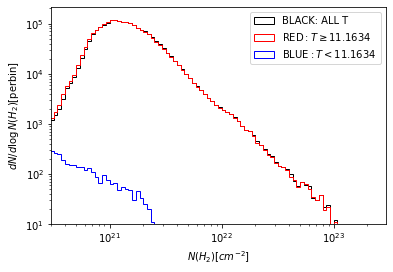

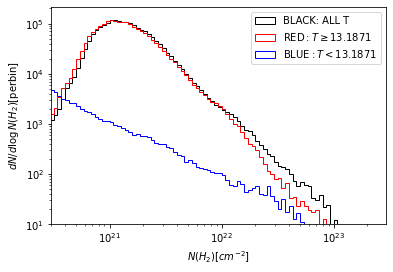

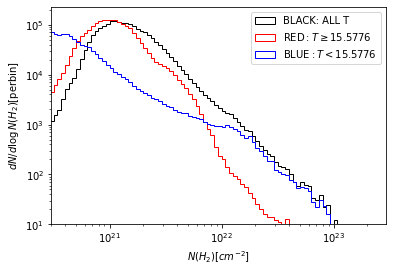

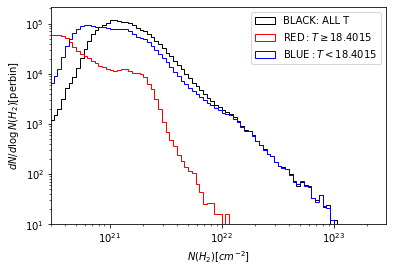

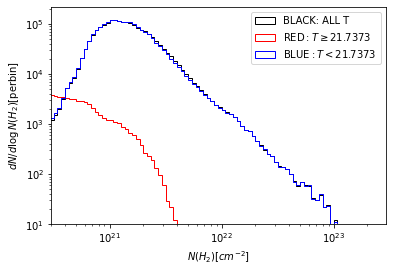

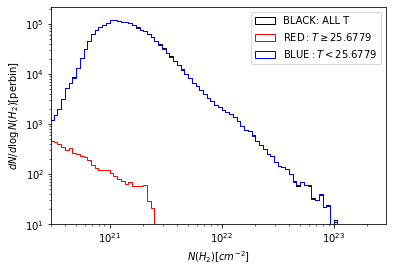

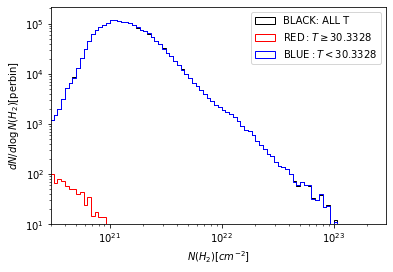

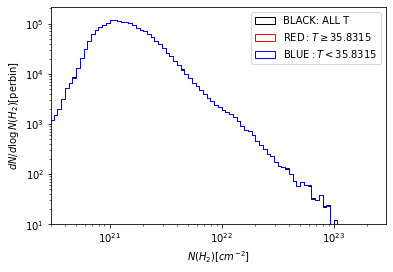

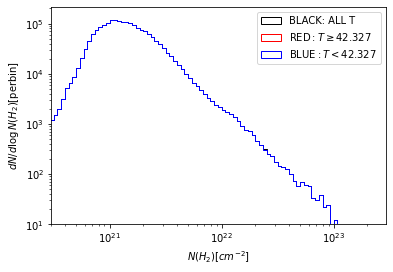

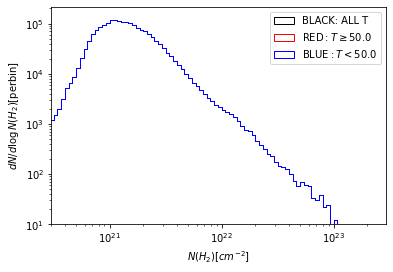

In [140]:
PATH = 'D:/Workshop/PhD/Data/ViaLactea/Temperature Analysis/l224/Images/Moving T threshold'
for T in pd.unique(df['T'])[1:]:
    plt.figure()
    plt.hist(df[['x','y','N']].groupby(['x','y']).sum()['N'], 
             log=True, 
             bins = bins,
             histtype = u'step',
             color='k',
             label= 'BLACK: ALL T')
    plt.hist(df[df['T']>= T][['x','y','N']].groupby(['x','y']).sum()['N'], 
             log=True, 
             bins = bins,
             histtype = u'step',
             color='r',
             label= fr'$\mathrm{{RED:}} T \geq {T}$')
    plt.hist(df[df['T']<T][['x','y','N']].groupby(['x','y']).sum()['N'], 
             log=True, 
             bins = bins,
             histtype = u'step',
             color='b',
             label= fr'$\mathrm{{BLUE:}} T < {T}$')
    plt.xscale('log')
    plt.xlabel(r'$N(H_2) [cm^{-2}]$')
    plt.ylabel(r'$dN/d\logN(H_2)[\mathrm{per bin}]$')
    plt.legend()
    plt.ylim(1e1)
    plt.xlim(3e20)
    plt.savefig(PATH+f'/{int(T):02}.png')
    plt.show()
    

C:\Users\Matt\.conda\envs\astronomy\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\Matt\.conda\envs\astronomy\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


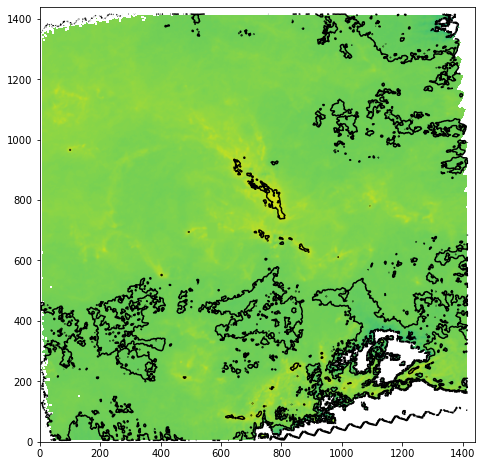

In [153]:
plt.figure(figsize=(8,8))
plt.imshow(np.log10(hdu[0].data[3]), origin='lower')
plt.contour(np.log10(hdu[0].data[3]), colors = 'k')
plt.show()

C:\Users\Matt\.conda\envs\astronomy\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


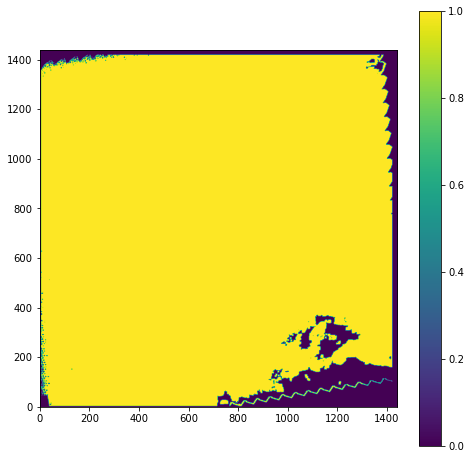

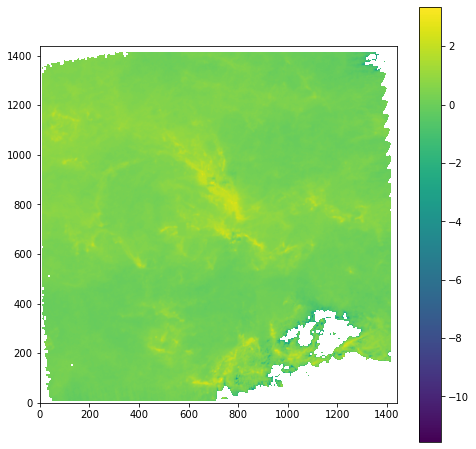

In [193]:
image = np.log10(hdu[0].data[3])
mask = np.where(np.isnan(image) | np.isinf(image),0,1).astype(np.uint8)
plt.figure(figsize=(8,8))
plt.imshow(mask, origin='lower')
plt.colorbar()
plt.figure(figsize=(8,8))
plt.imshow(image, origin='lower')
plt.colorbar()

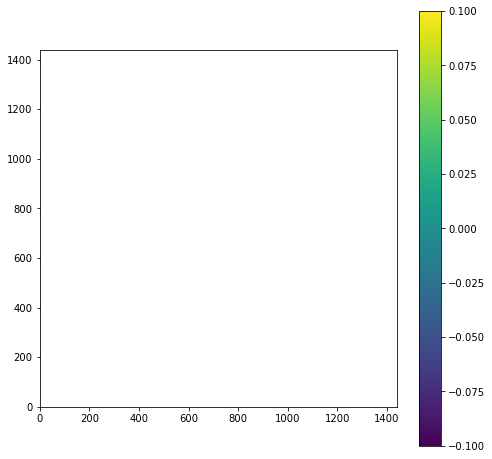

In [194]:
dst = cv.inpaint(image,mask,3,cv.INPAINT_TELEA)

plt.figure(figsize=(8,8))
plt.imshow(dst, origin='lower')
plt.colorbar()